In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the training set
dataset_train = pd.read_csv('dataset/RNN/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values


In [5]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [7]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [9]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [10]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [16]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 300, batch_size = 32)

Epoch 1/300
38/38 [==============================] - 2s 40ms/step - loss: 0.0011
Epoch 2/300
38/38 [==============================] - 2s 41ms/step - loss: 0.0010
Epoch 3/300
38/38 [==============================] - 2s 41ms/step - loss: 9.0944e-04
Epoch 4/300
38/38 [==============================] - 2s 41ms/step - loss: 0.0010
Epoch 5/300
38/38 [==============================] - 2s 40ms/step - loss: 8.6596e-04
Epoch 6/300
38/38 [==============================] - 2s 41ms/step - loss: 8.4080e-04
Epoch 7/300
38/38 [==============================] - 2s 41ms/step - loss: 8.7602e-04
Epoch 8/300
38/38 [==============================] - 2s 40ms/step - loss: 8.5718e-04
Epoch 9/300
38/38 [==============================] - 2s 40ms/step - loss: 8.4878e-04
Epoch 10/300
38/38 [==============================] - 2s 40ms/step - loss: 8.8547e-04
Epoch 11/300
38/38 [==============================] - 2s 40ms/step - loss: 9.3991e-04
Epoch 12/300
38/38 [==============================] - 2s 41ms/step - loss: 

1/1 [==============================] - 0s 24ms/step


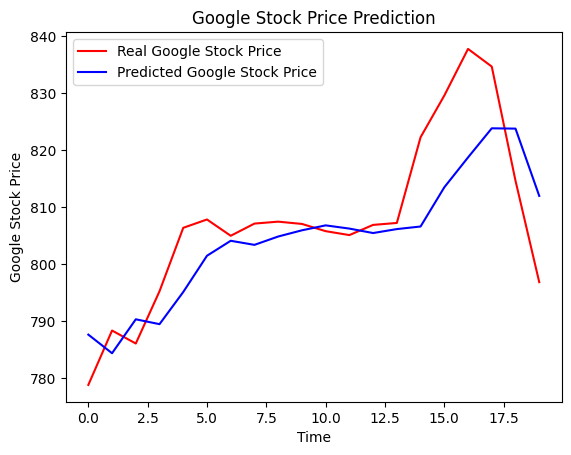

In [17]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('dataset/RNN/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()